<i>Updated 21/Nov/2021</i> by Yoshihisa Nitta &nbsp; <img src="https://nw.tsuda.ac.jp/icons/nitta-email.gif" />


# Further Training of Variational Auto Encoder for CelebA dataset with Tensorflow 2 on Google Colab

Train Variational Auto Encoder further on CelebA dataset.
It is assumed that it is in the state after executing VAE_CelebA_Train.ipynb.

## CelebA データセットに対して Variational Auto Encoder をGoogle Colab 上の Tensorflow 2 で追加学習する

CelebA データセットに対して変分オートエンコーダをさらに学習させる。
VAE_CelebA_Train.ipynb を実行した後の状態であることを前提としている。

In [1]:
#! pip install tensorflow==2.7.0

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)

2.7.0


# Check the Google Colab runtime environment

## Google Colab 実行環境を調べる

In [3]:
! nvidia-smi
! cat /proc/cpuinfo
! cat /etc/issue
! free -h

Sun Nov 21 14:45:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive from Google Colab

## Google Colab から GoogleDrive をマウントする

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! ls /content/drive

MyDrive  Shareddrives


# Download source file from Google Drive or nw.tsuda.ac.jp

Basically, <code>gdown</code> from Google Drive.
Download from nw.tsuda.ac.jp above only if the specifications of Google Drive change and you cannot download from Google Drive.

# Google Drive または nw.tsuda.ac.jp からファイルをダウンロードする

基本的に Google Drive から <code>gdown</code> してください。
Google Drive の仕様が変わってダウンロードができない場合にのみ、nw.tsuda.ac.jp からダウンロードしてください。

In [9]:
# Download source file
nw_path = './nw'
! rm -rf {nw_path}
! mkdir -p {nw_path}

if True:   # from Google Drive
    url_model =  'https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3'
    ! (cd {nw_path}; gdown {url_model})
else:      # from nw.tsuda.ac.jp
    URL_NW = 'https://nw.tsuda.ac.jp/lec/GoogleColab/pub'
    url_model = f'{URL_NW}/models/VariationalAutoEncoder.py'
    ! wget -nd {url_model} -P {nw_path}

Downloading...
From: https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3
To: /content/nw/VariationalAutoEncoder.py
100% 18.7k/18.7k [00:00<00:00, 16.3MB/s]


In [10]:
! cat {nw_path}/VariationalAutoEncoder.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import datetime

class Sampling(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        mu, log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.keras.backend.shape(mu), mean=0., stddev=1.)
        return mu + tf.keras.backend.exp(log_var / 2) * epsilon


class VAEModel(tf.keras.models.Model):
    def __init__(self, encoder, decoder, r_loss_factor, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.r_loss_factor = r_loss_factor


    @tf.function
    def loss_fn(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.square(x - reconstruction), axis=[1,2,3]
        ) * self.r_loss_factor
        kl_loss = tf.reduce_sum(
   

# Preparing CelebA dataset

Official WWW of CelebA dataset:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

Google Drive of CelebA dataset:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

img_align_celeba.zip mirrored on my Google Drive:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

## CelebA データセットを用意する

CelebA データセットの公式ページ:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

CelebA データセットのGoogle Drive:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

自分の Google Drive 上にミラーした img_align_celeba.zip:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

In [11]:
# Download img_align_celeba.zip from GoogleDrive

MIRRORED_URL = 'https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx'

! gdown {MIRRORED_URL}

Downloading...
From: https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
To: /content/img_align_celeba.zip
100% 1.44G/1.44G [00:06<00:00, 238MB/s]


In [12]:
! ls -l

total 1409676
drwx------ 6 root root       4096 Nov 21 14:46 drive
-rw-r--r-- 1 root root 1443490838 Nov 21 14:49 img_align_celeba.zip
drwxr-xr-x 2 root root       4096 Nov 21 14:48 nw
drwxr-xr-x 1 root root       4096 Nov 18 14:36 sample_data


In [13]:
DATA_DIR = 'data'
DATA_SUBDIR = 'img_align_celeba'

In [14]:
! rm -rf {DATA_DIR}
! unzip -d {DATA_DIR} -q {DATA_SUBDIR}.zip

In [15]:
! ls -l {DATA_DIR}/{DATA_SUBDIR} | head
! ls {DATA_DIR}/{DATA_SUBDIR} | wc

total 1737936
-rw-r--r-- 1 root root 11440 Sep 28  2015 000001.jpg
-rw-r--r-- 1 root root  7448 Sep 28  2015 000002.jpg
-rw-r--r-- 1 root root  4253 Sep 28  2015 000003.jpg
-rw-r--r-- 1 root root 10747 Sep 28  2015 000004.jpg
-rw-r--r-- 1 root root  6351 Sep 28  2015 000005.jpg
-rw-r--r-- 1 root root  8073 Sep 28  2015 000006.jpg
-rw-r--r-- 1 root root  8203 Sep 28  2015 000007.jpg
-rw-r--r-- 1 root root  7725 Sep 28  2015 000008.jpg
-rw-r--r-- 1 root root  8641 Sep 28  2015 000009.jpg
 202599  202599 2228589


# Check the CelebA dataset

## CelebA データセットを確認する

In [18]:
# paths to all the image files.

import os
import glob
import numpy as np

all_file_paths = np.array(glob.glob(os.path.join(DATA_DIR, DATA_SUBDIR, '*.jpg')))
n_all_images = len(all_file_paths)

print(n_all_images)

202599


In [19]:
# slect some image files.

n_to_show = 10
selected_indices = np.random.choice(range(n_all_images), n_to_show)
selected_paths = all_file_paths[selected_indices]

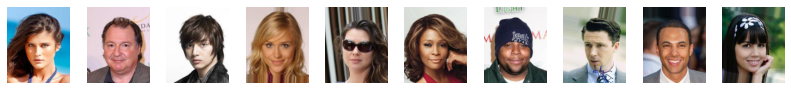

In [20]:
# Display some images.
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, n_to_show, figsize=(1.4 * n_to_show, 1.4))
for i, path in enumerate(selected_paths):
    img = tf.keras.preprocessing.image.load_img(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

# Separate image files for train and test

## 画像ファイルを学習用とテスト用に分割する

In [16]:
TRAIN_DATA_DIR = 'train_data'
TEST_DATA_DIR = 'test_data'

In [21]:
import os

split = 0.05

indices = np.arange(n_all_images)
np.random.shuffle(indices)
train_indices = indices[: -int(n_all_images * split)]
test_indices = indices[-int(n_all_images * split):]

! rm -rf {TRAIN_DATA_DIR} {TEST_DATA_DIR}

dst=f'{TRAIN_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in train_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

dst=f'{TEST_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in test_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

# Prepare ImageDataGenerator

<code>flow_from_directory()</code> requires to specify the parent directory of the directory where the image files are located.

## ImageDataGenerator を用意する

<code>flow_from_directory()</code> では image files があるディレクトリの親ディレクトリを指定する必要がある。

In [22]:
INPUT_DIM = (128, 128, 3)
BATCH_SIZE = 32

In [23]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255
    )

data_flow = data_gen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

val_data_flow = data_gen.flow_from_directory(
    TEST_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

Found 192470 images belonging to 1 classes.
Found 10129 images belonging to 1 classes.


In [24]:
print(len(data_flow))
print(len(val_data_flow))

6015
317


# Load the Neural Network Model trained before

Load the model trained by the '(3) Training' method of VAE_CelebA_Train.ipynb.

## 学習済みのニューラルネットワーク・モデルをロードする

VAE_CelebA_Train.ipynb の 「(3) 学習」方法で学習したモデルをロードする。

In [26]:
save_path3 = '/content/drive/MyDrive/ColabRun/VAE_CelebA03/'

In [47]:
# Load the parameters and model weights saved before
# 保存したパラメータと重みを読み込む

from nw.VariationalAutoEncoder import VariationalAutoEncoder

vae3 = VariationalAutoEncoder.load(save_path3)
print(vae3.epoch)

4


# Load the saved loss transition of training before

## 以前の学習で保存した loss の遷移をロードする

In [48]:
import os
import pickle

var_path = f'{save_path3}/loss_{vae3.epoch-1}.pkl'

with open(var_path, 'rb') as f:
    loss3_1, rloss3_1, kloss3_1, val_loss3_1, val_rloss3_1, val_kloss3_1 = pickle.load(f)

In [49]:
print(len(loss3_1))

4


# Train in addition
## 追加で学習する

In [50]:
LEARNING_RATE = 0.0005

In [51]:
# initial_learning_rate * decay_rate ^ (step // decay_steps)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = LEARNING_RATE,
    decay_steps = len(data_flow),
    decay_rate=0.96
)

optimizer3 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [52]:
log3_2 = vae3.train_tf_generator(
    data_flow,
    epochs = 200,
    run_folder = save_path3,
    optimizer = optimizer3,
    save_epoch_interval = 50,
    validation_data_flow = val_data_flow
)

5/200 6015 loss: total 200.568 reconstruction 139.167 kl 61.402 val loss total 199.716 reconstruction 138.757 kl 60.959 0:04:32.413829
6/200 6015 loss: total 199.201 reconstruction 137.740 kl 61.461 val loss total 198.803 reconstruction 135.566 kl 63.236 0:09:00.840572
7/200 6015 loss: total 198.084 reconstruction 136.619 kl 61.464 val loss total 197.773 reconstruction 138.099 kl 59.674 0:13:28.770028
8/200 6015 loss: total 197.448 reconstruction 135.976 kl 61.471 val loss total 197.090 reconstruction 135.068 kl 62.023 0:17:56.283880
9/200 6015 loss: total 196.674 reconstruction 135.245 kl 61.429 val loss total 196.911 reconstruction 136.293 kl 60.618 0:22:23.191827
10/200 6015 loss: total 196.214 reconstruction 134.815 kl 61.398 val loss total 195.840 reconstruction 134.457 kl 61.383 0:26:52.411447
11/200 6015 loss: total 195.389 reconstruction 134.051 kl 61.338 val loss total 195.385 reconstruction 134.659 kl 60.726 0:31:21.585673
12/200 6015 loss: total 195.514 reconstruction 134.11

In [53]:
loss3_2 = log3_2['loss']
rloss3_2 = log3_2['reconstruction_loss']
kloss3_2 = log3_2['kl_loss']
val_loss3_2 = log3_2['val_loss']
val_rloss3_2 = log3_2['val_reconstruction_loss']
val_kloss3_2 = log3_2['val_kl_loss']

In [54]:
loss3 = np.concatenate([loss3_1, loss3_2], axis=0)
rloss3 = np.concatenate([rloss3_1, rloss3_2], axis=0)
kloss3 = np.concatenate([kloss3_1, kloss3_2], axis=0)

val_loss3 = np.concatenate([val_loss3_1, val_loss3_2], axis=0)
val_rloss3 = np.concatenate([val_rloss3_1, val_rloss3_2], axis=0)
val_kloss3 = np.concatenate([val_kloss3_1, val_kloss3_2], axis=0)

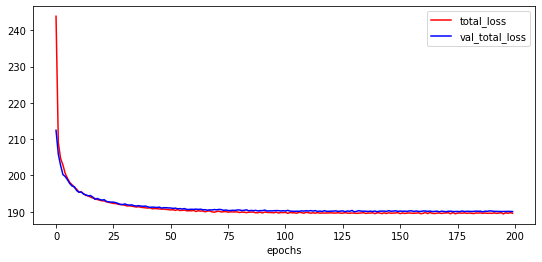

In [55]:
VariationalAutoEncoder.plot_history(
    [loss3, val_loss3], 
    ['total_loss', 'val_total_loss']
)

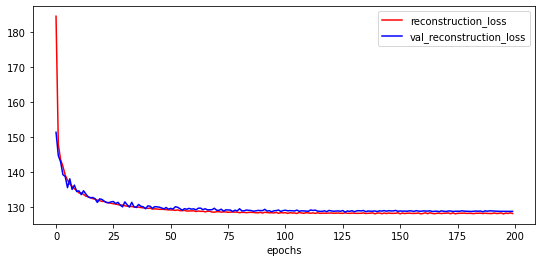

In [56]:
VariationalAutoEncoder.plot_history(
    [rloss3, val_rloss3], 
    ['reconstruction_loss', 'val_reconstruction_loss']
)

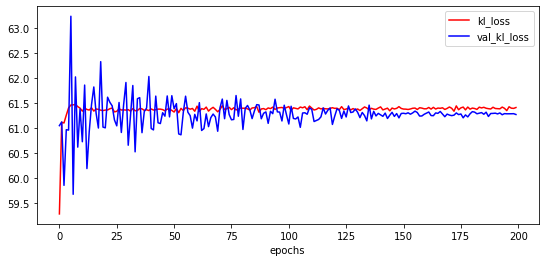

In [57]:
VariationalAutoEncoder.plot_history(
    [kloss3, val_kloss3], 
    ['kl_loss', 'val_kl_loss']
)

In [58]:
x_, _ = next(val_data_flow)
selected_images = x_[:10]

In [60]:
z_mean3, z_log_var3, z3 = vae3.encoder(selected_images)
reconst_images3 = vae3.decoder(z3).numpy()  # decoder() returns Tensor for @tf.function declaration. Convert the Tensor to numpy array.
txts3 = [f'{p[0]:.3f}, {p[1]:.3f}' for p in z3 ]

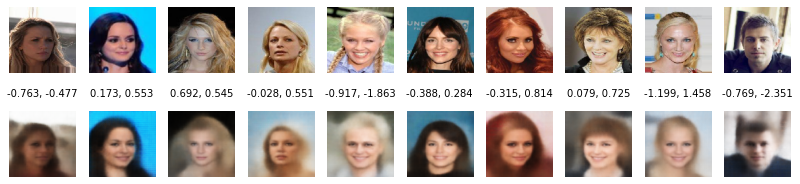

In [62]:
%matplotlib inline

VariationalAutoEncoder.showImages(selected_images, reconst_images3, txts3, 1.4, 1.4)

# Save the loss transition for future training.

Save the loss transition to the file 'loss_<i>N</i>.pkl'.

# 将来の学習のために、loss の変遷をセーブしておく

「(3) 学習」のlossの変遷を 'loss_<i>N</i>.pkl' ファイルにセーブしておく。

In [63]:
# Save loss variables for future training
# 将来の学習のために loss 変数をセーブしておく
import os
import pickle

var_path = f'{save_path3}/loss_{vae3.epoch-1}.pkl'

dpath, fname = os.path.split(var_path)
if dpath != '' and not os.path.exists(dpath):
    os.makedirs(dpath)

with open(var_path, 'wb') as f:
    pickle.dump([
        loss3, 
        rloss3, 
        kloss3, 
        val_loss3, 
        val_rloss3, 
        val_kloss3         
    ], f)